In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [65]:
import pandas as pd
import io
df = pd.read_csv('VOL output.csv')

In [66]:
df.index = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# df.set_index('Date', inplace=True)
df.head()

Date  Actual VOL     GARCH        RF  LSTM - GA  LSTM - GS
Date                                                                        
2023-03-28  28/03/2023    0.010955  0.011033  0.012066   0.010880   0.013034
2023-03-29  29/03/2023    0.012362  0.012012  0.011119   0.010395   0.011773
2023-03-30  30/03/2023    0.014811  0.012112  0.011433   0.010209   0.011916
2023-03-31  31/03/2023    0.009079  0.010833  0.011854   0.010522   0.012512
2023-04-01  01/04/2023    0.004581  0.009618  0.011324   0.008685   0.010232

In [67]:
df.columns

Index(['Date', 'Actual VOL', 'GARCH', 'RF', 'LSTM - GA', 'LSTM - GS'], dtype='object')

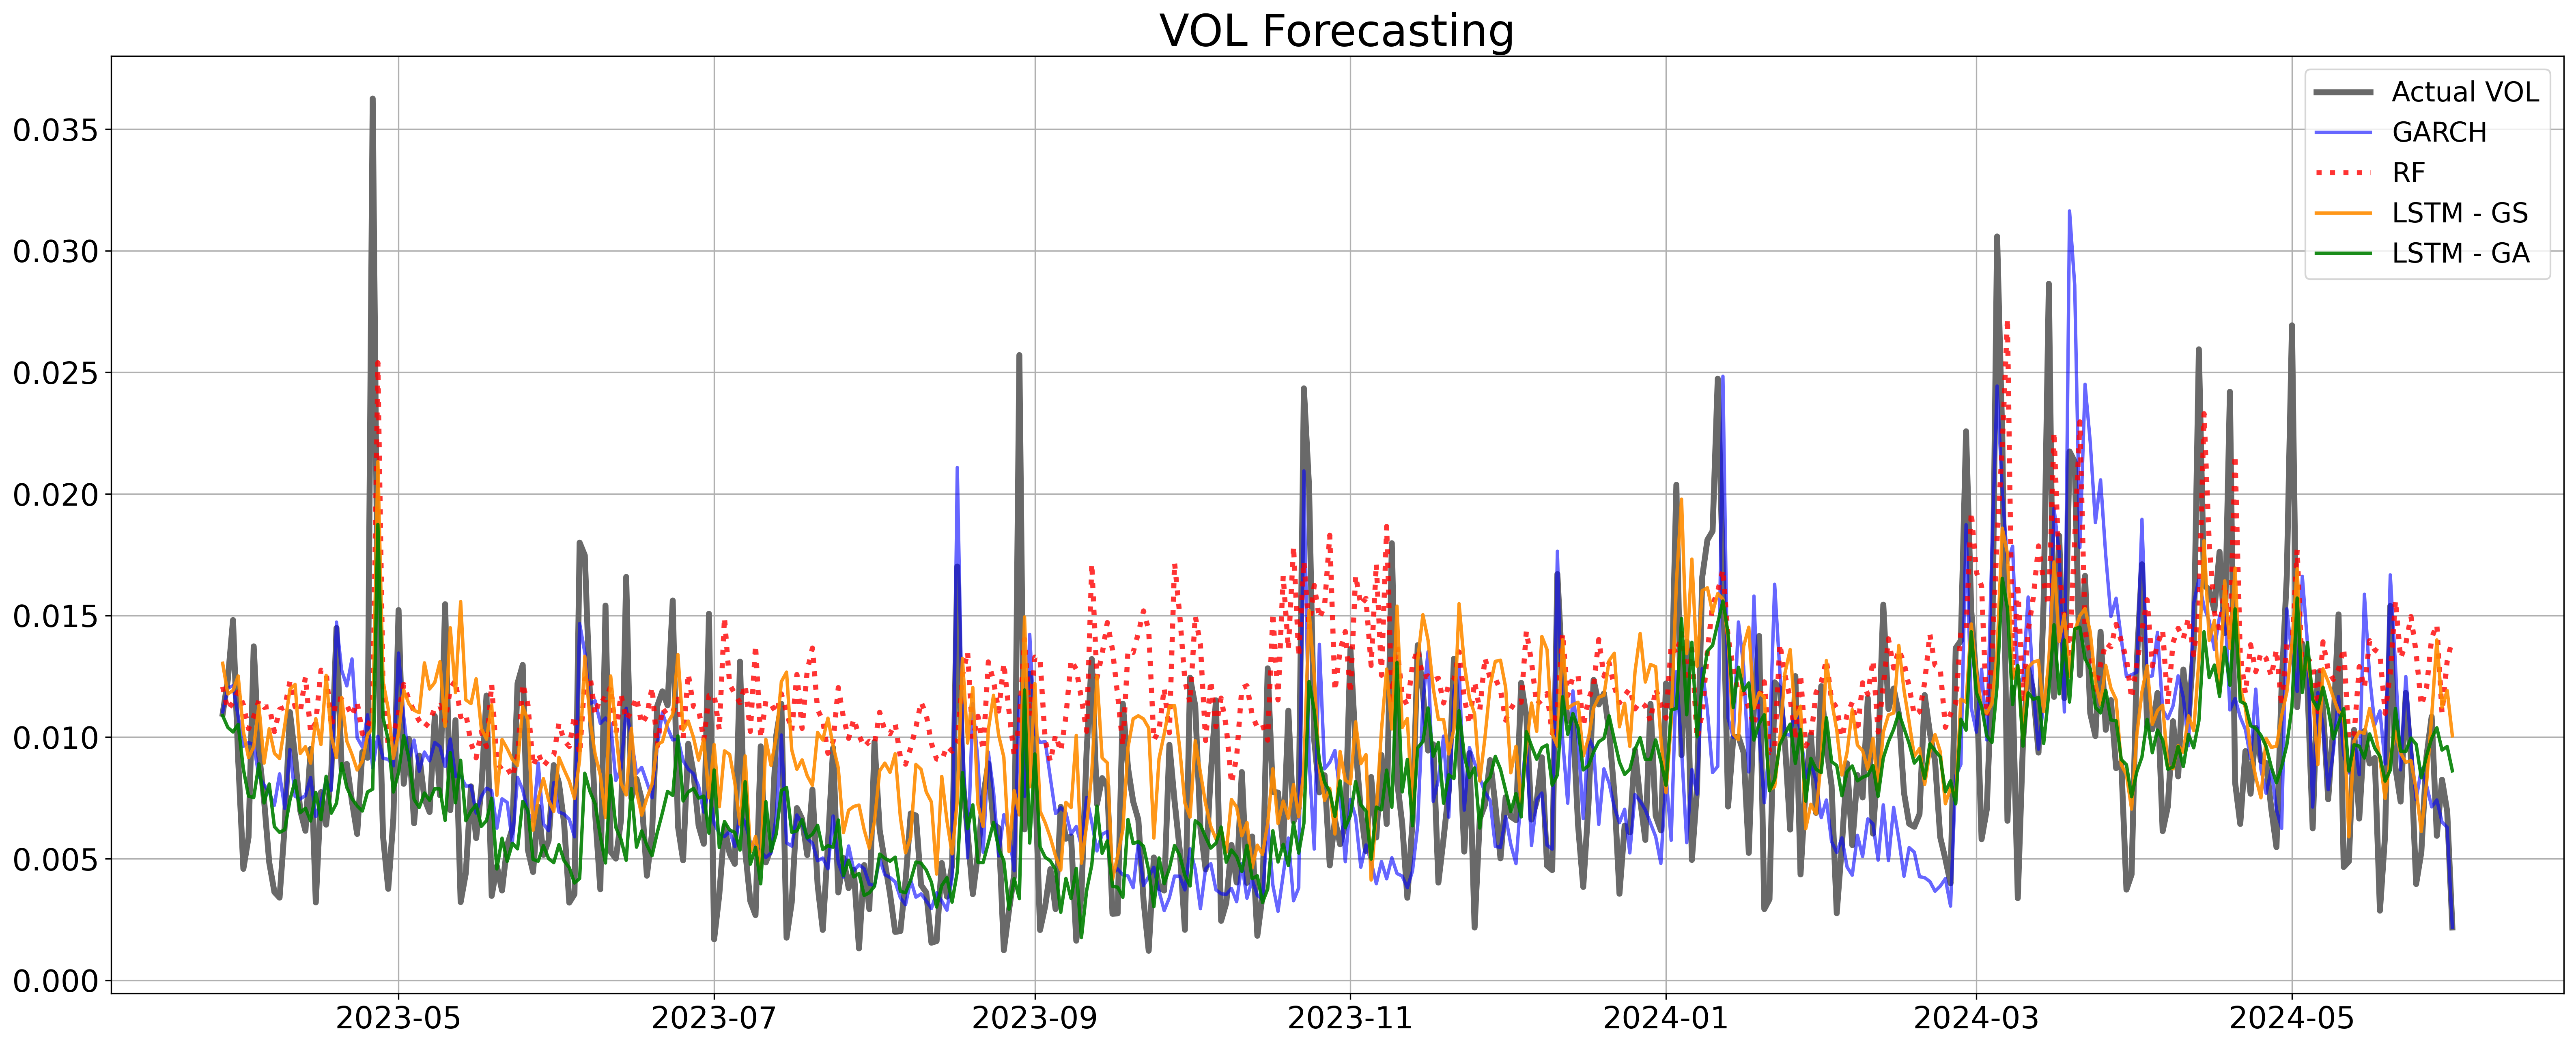

In [121]:
# Plotting
plt.figure(figsize=(26,10), dpi = 300)

# Plot Actual Price as a solid black line
plt.plot(df.index, df['Actual VOL'], color='dimgray', linestyle='-', label='Actual VOL', linewidth=3.5)

# Plot other series as dashed lines with different colors
plt.plot(df.index, df['GARCH'], color='blue', linestyle='-', label='GARCH', alpha = 0.6, linewidth=2)
plt.plot(df.index, df['RF'], color='red', linestyle=':', label='RF', alpha = 0.8,linewidth=3)
plt.plot(df.index, df['LSTM - GS'], color='darkorange', linestyle='-', label='LSTM - GS', alpha = 0.9, linewidth=2)
plt.plot(df.index, df['LSTM - GA'], color='green', linestyle='-', label='LSTM - GA', alpha = 0.9, linewidth=2)

# Adding labels and title
plt.title('VOL Forecasting', fontsize=26)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)

# Show plot
plt.show()


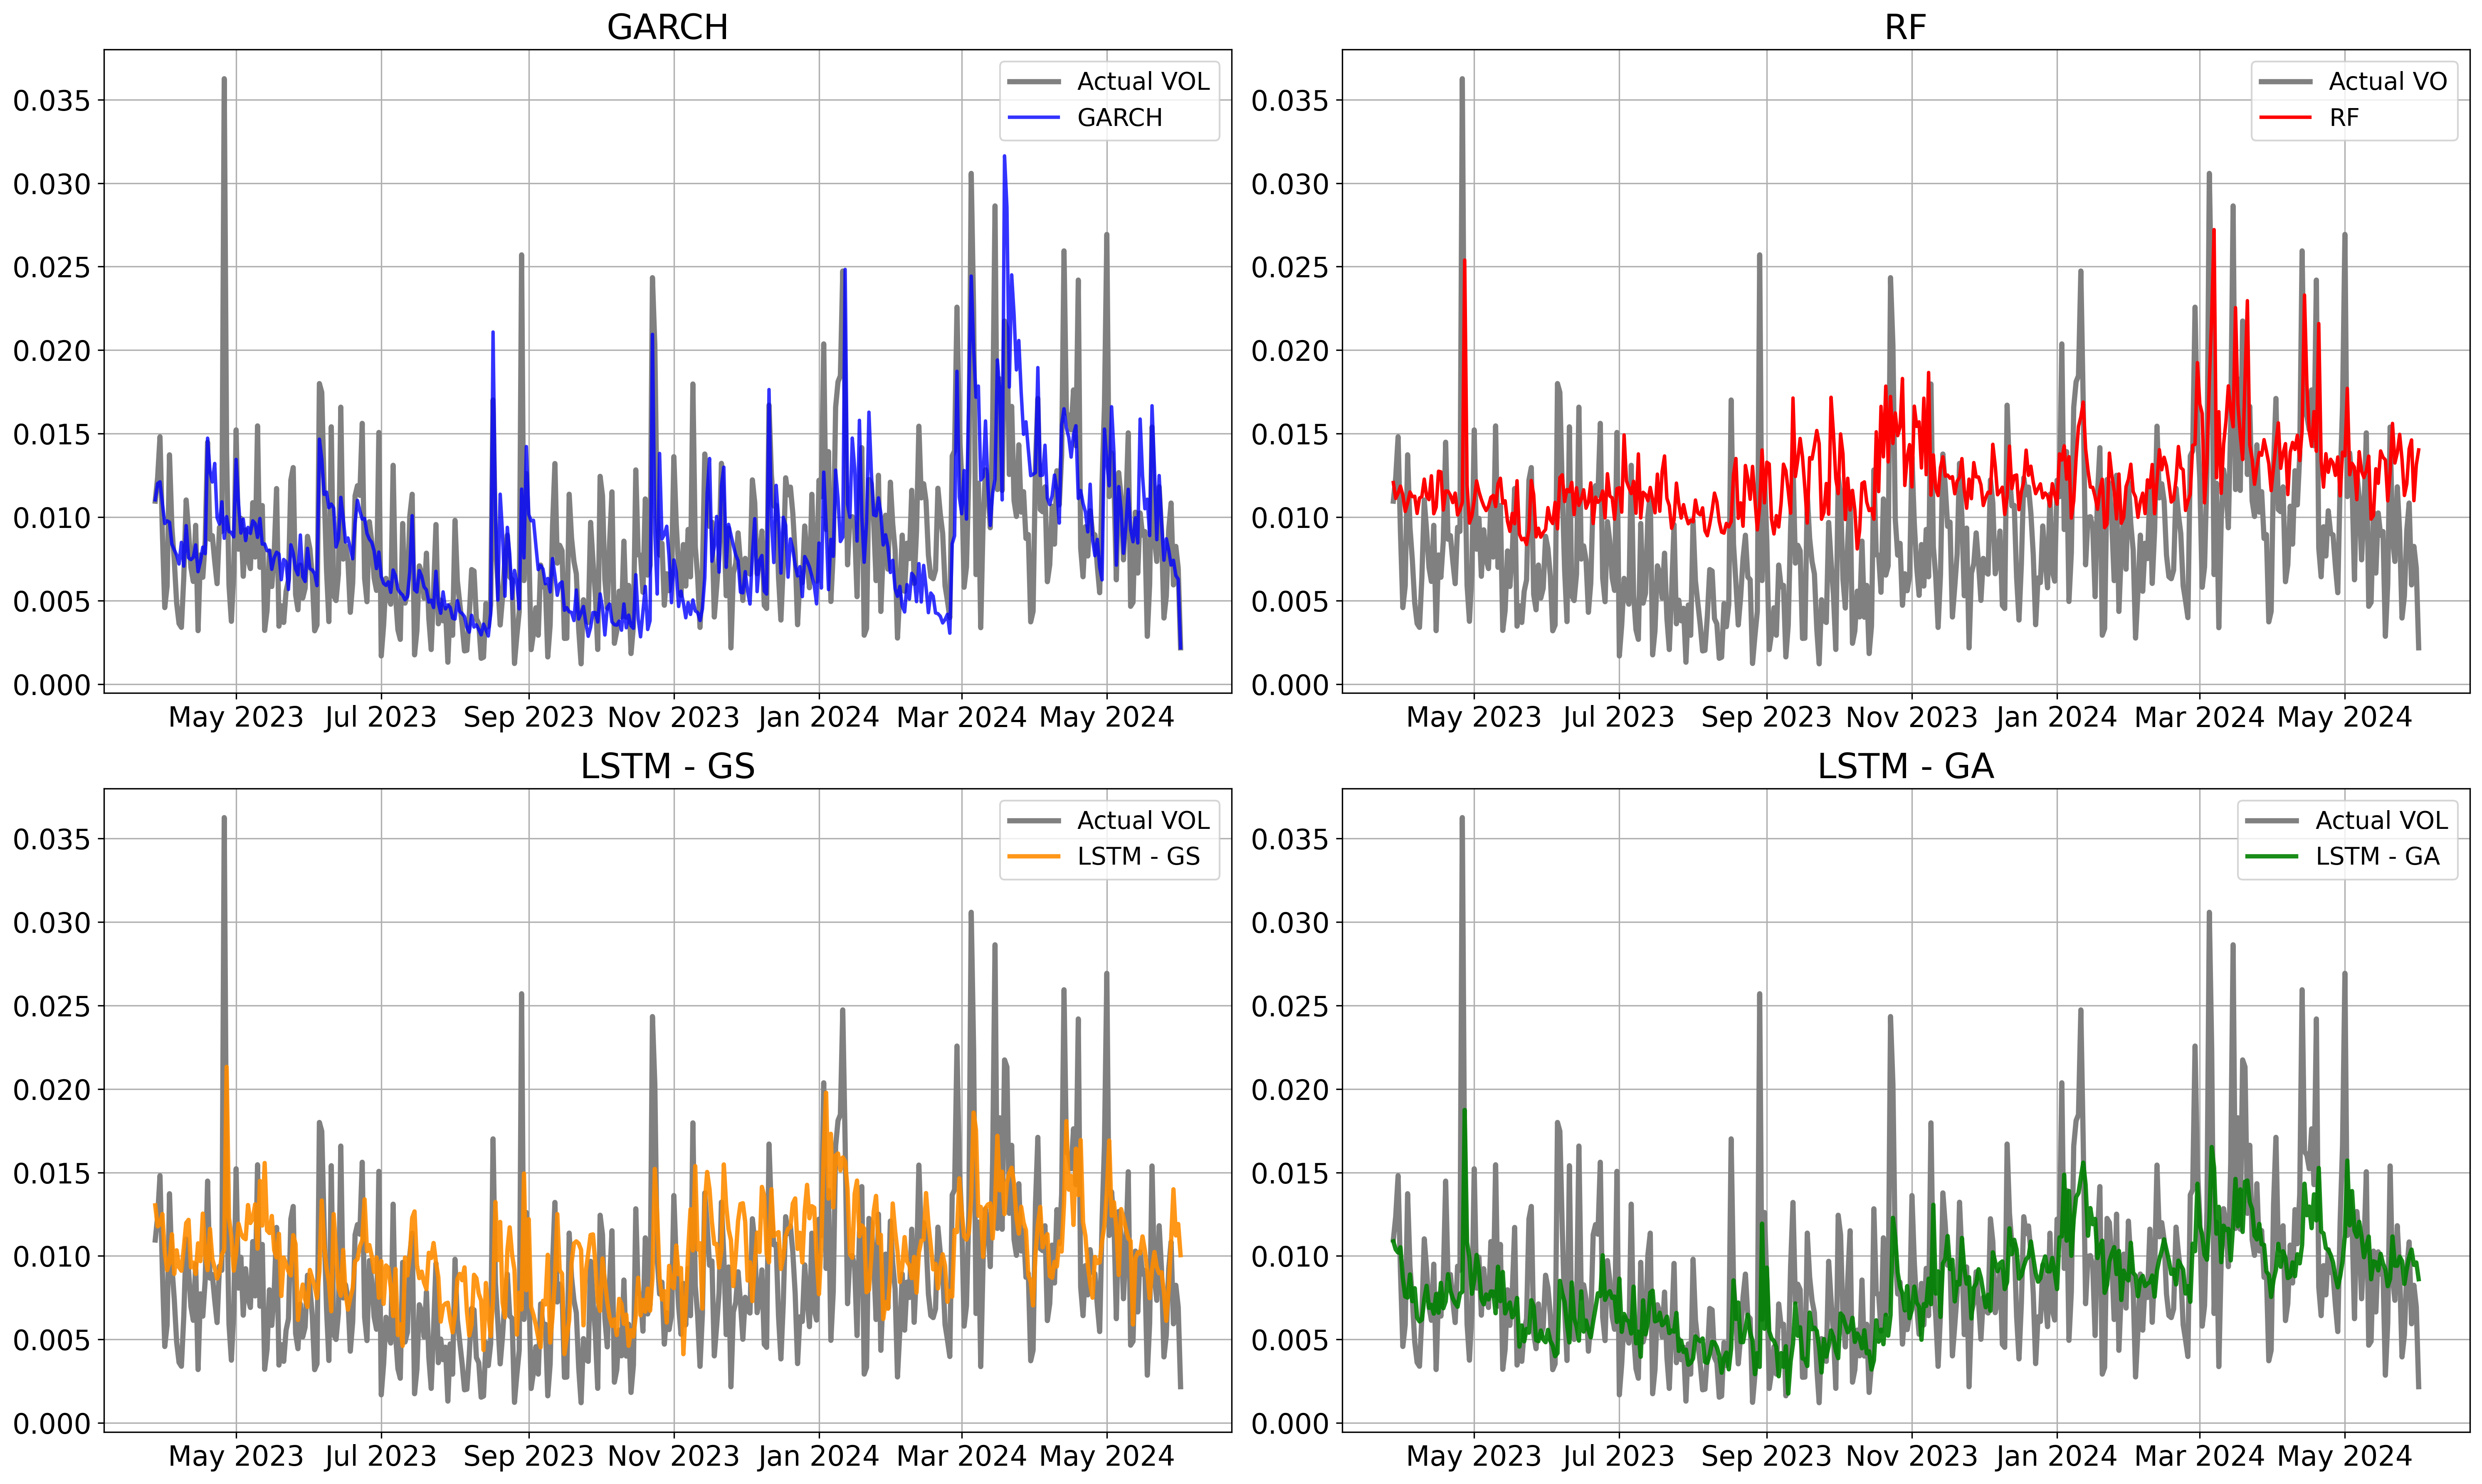

In [106]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Example DataFrame (assumed to be defined as df)
# df = pd.DataFrame({...})  # Your data should already be in df

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20 ,12), dpi=300)

# # Plot Actual Price and ARIMA on the first subplot
axs[0, 0].plot(df.index, df['Actual VOL'], color='grey', linestyle='-', label='Actual VOL', linewidth=3)
axs[0, 0].plot(df.index, df['GARCH'], color='blue', linestyle='-', label='GARCH', alpha = 0.8, linewidth=2)
axs[0, 0].set_title('GARCH', fontsize=20)
axs[0, 0].legend(fontsize=14)
axs[0, 0].grid(True)

# Plot Actual Price and RF on the second subplot
axs[0, 1].plot(df.index, df['Actual VOL'], color='grey', linestyle='-', label='Actual VO', linewidth=3)
axs[0, 1].plot(df.index, df['RF'], color='red', linestyle='-', label='RF', alpha=1, linewidth=2)
axs[0, 1].set_title('RF', fontsize=20)
axs[0, 1].legend(fontsize=14)
axs[0, 1].grid(True)

# Plot Actual Price and LSTM - GS on the third subplot
axs[1, 0].plot(df.index, df['Actual VOL'], color='grey', linestyle='-', label='Actual VOL', linewidth=3)
axs[1, 0].plot(df.index, df['LSTM - GS'], color='darkorange', linestyle='-', label='LSTM - GS', alpha=0.9, linewidth=2.5)
axs[1, 0].set_title('LSTM - GS', fontsize=20)
axs[1, 0].legend(fontsize=14)
axs[1, 0].grid(True)

# Plot Actual Price and LSTM - GA on the fourth subplot
axs[1, 1].plot(df.index, df['Actual VOL'], color='grey', linestyle='-', label='Actual VOL', linewidth=3)
axs[1, 1].plot(df.index, df['LSTM - GA'], color='green', linestyle='-', label='LSTM - GA', alpha=0.9, linewidth=2.5)
axs[1, 1].set_title('LSTM - GA', fontsize=20)
axs[1, 1].legend(fontsize=14)
axs[1, 1].grid(True)

# Format x-axis with Month-Year
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)


# Adjust layout to fit labels
plt.tight_layout()

# Show plot
plt.show()


In [70]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da

In [122]:
results = {}
for model in ['GARCH', 'RF', 'LSTM - GS', 'LSTM - GA']:
    y_true = df['Actual VOL'].to_numpy()
    y_pred = df[model].to_numpy()
    rmse_value = rmse(y_true, y_pred)
    mape_value = mape(y_true, y_pred)
    nmse_value = nmse(y_true, y_pred)
    da_value = DA(y_true, y_pred)
    results[model] = {
        'RMSE': rmse_value,
        'MAPE': mape_value,
        'NMSE': nmse_value,
        'DA': da_value
    }
results_df = pd.DataFrame(results)
print(results_df)

          GARCH         RF  LSTM - GS  LSTM - GA
RMSE   0.004183   0.005966   0.004863   0.004532
MAPE  43.973165  97.277222  66.665058  43.955246
NMSE   0.722110   1.469148   0.976117   0.847714
DA    67.981439  44.547564  41.067285  41.299304


In [72]:
# results_df.to_csv('VOL metrics.csv')

PermissionError: [Errno 13] Permission denied: 'VOL metrics.csv'